Text(0.5, 1.0, '$\\mathbf{\\hat{X}}$')

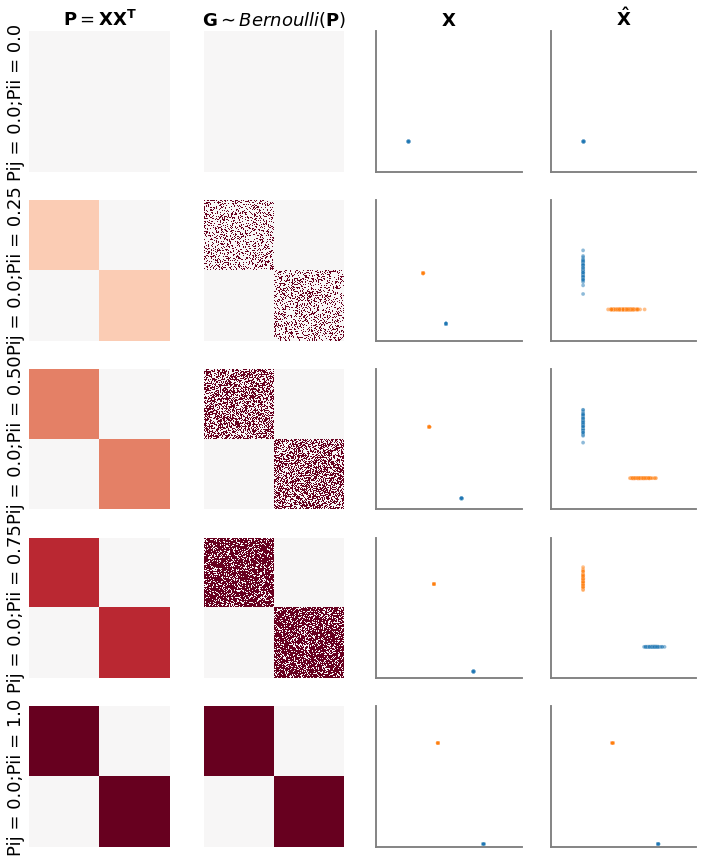

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from graspy.embed import AdjacencySpectralEmbed
from graspy.models import DCSBMEstimator, EREstimator, SBMEstimator
from graspy.models.sbm import _block_to_full, _get_block_indices
from graspy.simulations import er_np, sbm

rc_dict = {
    "axes.spines.right": False,
    "axes.spines.top": False,
    "axes.edgecolor": "grey",
}

for key, val in rc_dict.items():
    mpl.rcParams[key] = val
context = sns.plotting_context(context="talk", font_scale=1)
sns.set_context(context)

np.random.seed(8888)

p = 0.3
n = 200
sbm_graph_list = []
sbm_mats_list = []

for j in range(5):
    B = np.array([[0+(0.25*j), 0.0], [0.0, 0+(0.25*j)]])
    community_sizes = [n // 2, n // 2]

    sbm_graph, labels = sbm(community_sizes, B, return_labels=True, loops=True)
    sbm_graph_list.append(sbm_graph)
    # even more hacky way of getting SBM P matrix
    sbm_model = SBMEstimator(directed=False, loops=True)
    sbm_model.fit(sbm_graph, y=labels)
    sbm_model.block_p_ = B
    _, _, _block_inv = _get_block_indices(labels)
    sbm_model.p_mat_ = _block_to_full(B, _block_inv, sbm_graph.shape)
    sbm_mats_list.append(sbm_model.p_mat_)

#graphs = [er_graph, sbm_graph, dcsbm_graph]
#p_mats = [er_model.p_mat_, sbm_model.p_mat_, dcsbm_model.p_mat_]
graphs = sbm_graph_list
p_mats = sbm_mats_list
model_names = ["Pij = 0.0;Pii = 0.0", "Pij = 0.0;Pii = 0.25", "Pij = 0.0;Pii = 0.50", "Pij = 0.0;Pii = 0.75", "Pij = 0.0;Pii = 1.0"]


ase = AdjacencySpectralEmbed(n_components=2, check_lcc=False)

# applying a rotation that just makes the plots look nicer
theta = np.radians(0)
c, s = np.cos(theta), np.sin(theta)
R = np.array(((c, -s), (s, c)))

graph_latents = []
for graph in graphs:
    graph_latent = ase.fit_transform(graph)
    graph_latents.append(graph_latent @ R)

p_mat_latents = []
for p_mat in p_mats:
    p_mat_latent = ase.fit_transform(p_mat)
    p_mat_latents.append(p_mat_latent @ R)

n_models = len(model_names)
n_cols = 4
scale = 3

fig, axs = plt.subplots(n_models, n_cols, figsize=(scale * n_cols, scale * n_models))


def simple_heatmap(mat, ax):
    sns.heatmap(
        mat,
        ax=ax,
        xticklabels=False,
        yticklabels=False,
        cbar=False,
        cmap="RdBu_r",
        center=0,
        square=True,
        vmin=0,
        vmax=1,
    )

def simple_scatter(X, ax, y=None):
    sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        hue=y,
        s=15,
        linewidth=0.25,
        alpha=0.5,
        ax=ax,
        legend=False,
    )
    ax.set(
        xticks=[], yticks=[], xlabel="", ylabel="", xlim=(-0.4, 1.4), ylim=(-0.4, 1.4)
    )


y = None
for i, model_name in enumerate(model_names):
    graph = graphs[i]
    p_mat = p_mats[i]
    graph_latent = graph_latents[i]
    p_mat_latent = p_mat_latents[i]
    if i > 0:
        y = labels

    ax = axs[i, 0]
    simple_heatmap(p_mat, ax)
    ax.set_ylabel(model_name)

    ax = axs[i, 1]
    simple_heatmap(graph, ax)

    ax = axs[i, 2]
    simple_scatter(p_mat_latent, ax, y=y)

    ax = axs[i, 3]
    simple_scatter(graph_latent, ax, y=y)

axs[0, 0].set_title(r"$\mathbf{P} = \mathbf{X X^T}$")
axs[0, 1].set_title(r"$\mathbf{G} \sim Bernoulli(\mathbf{P})$")
axs[0, 2].set_title(r"$\mathbf{X}$")
axs[0, 3].set_title(r"$\mathbf{\hat{X}}$")

Text(0.5, 1.0, '$\\mathbf{\\hat{X}}$')

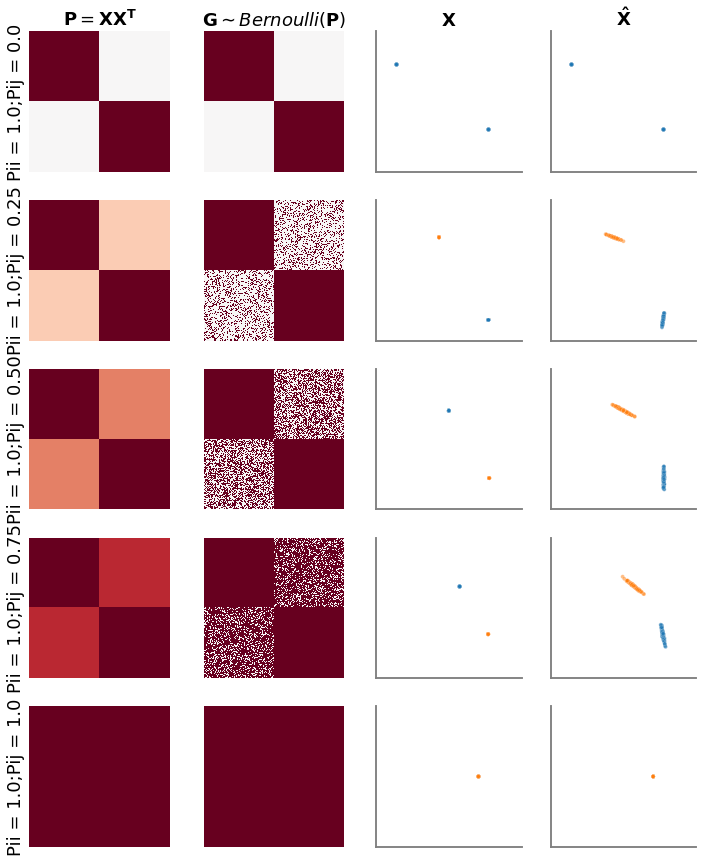

In [2]:
sbm_graph_list = []
sbm_mats_list = []

for j in range(5):
    B = np.array([[1, 0+(0.25*j)], [0+(0.25*j), 1]])
    community_sizes = [n // 2, n // 2]

    sbm_graph, labels = sbm(community_sizes, B, return_labels=True, loops=True)
    sbm_graph_list.append(sbm_graph)
    # even more hacky way of getting SBM P matrix
    sbm_model = SBMEstimator(directed=False, loops=True)
    sbm_model.fit(sbm_graph, y=labels)
    sbm_model.block_p_ = B
    _, _, _block_inv = _get_block_indices(labels)
    sbm_model.p_mat_ = _block_to_full(B, _block_inv, sbm_graph.shape)
    sbm_mats_list.append(sbm_model.p_mat_)

#graphs = [er_graph, sbm_graph, dcsbm_graph]
#p_mats = [er_model.p_mat_, sbm_model.p_mat_, dcsbm_model.p_mat_]
graphs = sbm_graph_list
p_mats = sbm_mats_list
model_names = ["Pii = 1.0;Pij = 0.0", "Pii = 1.0;Pij = 0.25", "Pii = 1.0;Pij = 0.50", "Pii = 1.0;Pij = 0.75", "Pii = 1.0;Pij = 1.0"]

ase = AdjacencySpectralEmbed(n_components=2, check_lcc=False)

# applying a rotation that just makes the plots look nicer
theta = np.radians(-30)
c, s = np.cos(theta), np.sin(theta)
R = np.array(((c, -s), (s, c)))

graph_latents = []
for graph in graphs:
    graph_latent = ase.fit_transform(graph)
    graph_latents.append(graph_latent @ R)

p_mat_latents = []
for p_mat in p_mats:
    p_mat_latent = ase.fit_transform(p_mat)
    p_mat_latents.append(p_mat_latent @ R)

n_models = len(model_names)
n_cols = 4
scale = 3

fig, axs = plt.subplots(n_models, n_cols, figsize=(scale * n_cols, scale * n_models))

y = None
for i, model_name in enumerate(model_names):
    graph = graphs[i]
    p_mat = p_mats[i]
    graph_latent = graph_latents[i]
    p_mat_latent = p_mat_latents[i]
    if i > 0:
        y = labels

    ax = axs[i, 0]
    simple_heatmap(p_mat, ax)
    ax.set_ylabel(model_name)

    ax = axs[i, 1]
    simple_heatmap(graph, ax)

    ax = axs[i, 2]
    simple_scatter(p_mat_latent, ax, y=y)

    ax = axs[i, 3]
    simple_scatter(graph_latent, ax, y=y)

axs[0, 0].set_title(r"$\mathbf{P} = \mathbf{X X^T}$")
axs[0, 1].set_title(r"$\mathbf{G} \sim Bernoulli(\mathbf{P})$")
axs[0, 2].set_title(r"$\mathbf{X}$")
axs[0, 3].set_title(r"$\mathbf{\hat{X}}$")